<a href="https://colab.research.google.com/github/abrar39/Cornell-CS4780-SP17-Solutions/blob/master/Cornell_CS4780_SP17_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline

In [2]:
# Suppress the Userwarnings
warnings.filterwarnings("ignore", category=UserWarning)

## Problem # 2
### Part 1
Consider you have the following 2D dataset with binary class labels:
- Class +1: {(1, 2), (1, 4), (5, 4)}
- Class -1: {(3, 1), (3, 2)}

Suppose the data is strictly confined within the [0,5] x [0,5] grid. Draw the decision boundary for a 1-NN classifier with Euclidean distance. How would the point (5, 1) be classified?

In [3]:
# Create a 1-NN Classifier with Euclidean Distance
classifier = KNeighborsClassifier(n_neighbors=1)

In [4]:
# Create the dataframe from given data
x1 = np.array([1, 1, 5, 3, 3])
x2 = np.array([2, 4, 4, 1, 2])
y = np.array([1, 1, 1, -1, -1])

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df

,x1,x2,y
0,1,2,1
1,1,4,1
2,5,4,1
3,3,1,-1
4,3,2,-1


In [50]:
def plot_data_points(dataframe):
  """
  Plot the data points in the dataframe.
  arguments:
    dataframe: pandas dataframe with columns ['x1', 'x2', 'y']
  """

  fig, ax = plt.subplots(figsize=(6, 6))
  class_labels = {1: 'blue', -1: 'yellow'}

  for class_label in list(class_labels.keys()):
    color = class_labels[class_label]
    x = dataframe[dataframe['y'] == class_label]['x1']
    y = dataframe[dataframe['y'] == class_label]['x2']
    ax.scatter(x, y, c=color, label=class_label, alpha=0.3, edgecolors='none')

  ax.legend(loc="lower right")
  ax.grid(True)
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_title('Data Points')
  plt.show()

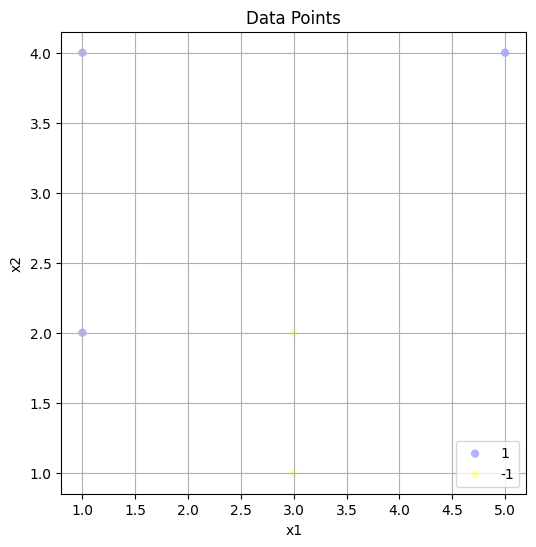

In [51]:
plot_data_points(df)

In [38]:
# Fit the classifier
x = df[['x1', 'x2']]
y = df['y']

classifier.fit(x, y)

KNeighborsClassifier(n_neighbors=1)

In [39]:
# check the parameters
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [40]:
# Predict the values
print(f"Classifier Prediction : {classifier.predict([[5, 1]])}")

Classifier Prediction : [-1]


**Plot the decision boundary for the classifier**

In [46]:
def plot_decision_boundary(classifier, X, y):
  """
  Function to plot the decision boundary of the classifier.
  arguments:
    classifier: classifier object
    X: pandas dataframe with columns ['x1', 'x2']
    y: pandas dataframe with column ['y']
  """
  x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
  y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1

  # Create the boudary object
  boundary = DecisionBoundaryDisplay.from_estimator(classifier, X=X)

  # Clear the current figure
  # This is required to plot only combined figure
  plt.clf()

  # Configure the plot
  boundary.plot(ax=None, cmap="coolwarm", alpha=0.8)
  plt.scatter(X['x1'], X['x2'], c=y, s=20, edgecolors='k', cmap="viridis")
  plt.xlabel('Feature 0')
  plt.ylabel('Feature 1')
  plt.title('Decision Boundary for Classifier')
  plt.show()

<Figure size 640x480 with 0 Axes>

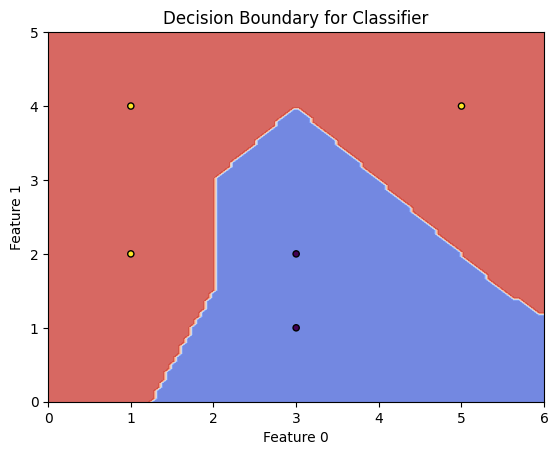

In [47]:
X = df[['x1', 'x2']]
y = df['y']
plot_decision_boundary(classifier, X, y)

### Part 2:
Your finnish friend Aleksanda works with the same dataset, however she measure the first coordinate in centimeters instead of meters (the second dimension is changed). The data thus becomes:
- Class +1: {(100, 2), (100, 4), (500, 4)}
- Class -1: {(300, 1), (300, 2)}

Does her 1-NN classifier classify points differently? What will she predict for the original data point which she represents as (500, 1)

In [53]:
# Create the second dataset
x12 = np.array([100, 100, 500, 300, 300])
x22 = np.array([2, 4, 4, 1, 2])
y2 = np.array([1, 1, 1, -1, -1])

df2 = pd.DataFrame({'x1': x12, 'x2': x22, 'y': y2})
df2

,x1,x2,y
0,100,2,1
1,100,4,1
2,500,4,1
3,300,1,-1
4,300,2,-1


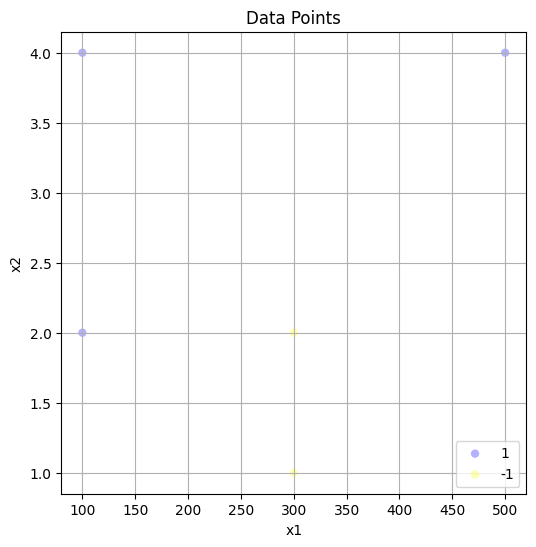

In [54]:
# Plot the datapoints
plot_data_points(df2)

In [43]:
# Create a second 1-NN classifier with Euclidean distance.
classifier2 = KNeighborsClassifier(n_neighbors=1)
x2 = df2[['x1', 'x2']]
y2 = df2['y']
classifier2.fit(x2, y2)

KNeighborsClassifier(n_neighbors=1)

In [45]:
print(f"2nd Classifier Prediction : {classifier2.predict([[500, 1]])}")

2nd Classifier Prediction : [1]


So, this classifier classifies the same point as a different class.

<Figure size 640x480 with 0 Axes>

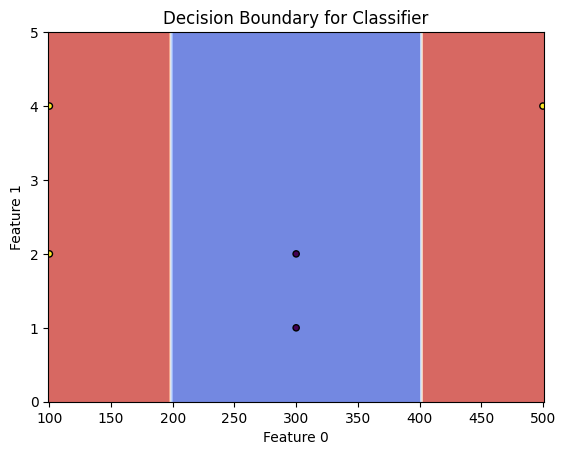

In [48]:
# Plot the second decision boundary
X = df2[['x1', 'x2']]
y = df2['y']
plot_decision_boundary(classifier2, X, y)

In [49]:
print(f"Pridiction by First Classifier : {classifier.predict([[5, 1]])}")
print(f"Pridiction by Second Classifier : {classifier2.predict([[500, 1]])}")

Pridiction by First Classifier : [-1]
Pridiction by Second Classifier : [1]


# Question # 3
k-NN can also be used for regression (i.e. your labels are real values now). Here instead of predicting the most common class amongst the neighbours, we predict the label average. Suppose you have the following dataset:
X = {(0, 0), (1, 1), (2, 3), (3, 1), (2, 1)}
Y = [1.0, 2.5, 3.0, 1.0, 2.5]

Where X is the feature vector, and Y is the label. What would be the label for (0, 1) if we use 2-NN with Euclidean distance.

In [55]:
# Prepare the dataset

X = np.array([[0, 0], [1, 1], [2, 3], [3, 1], [2, 1]])
Y = [1.0, 2.5, 3.0, 1.0, 2.5]

df3 = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': Y})
df3

,x1,x2,y
0,0,0,1.0
1,1,1,2.5
2,2,3,3.0
3,3,1,1.0
4,2,1,2.5


In [57]:
# create a regression regressor (i.e. K-NN regression classifier)
regressor = KNeighborsRegressor(n_neighbors=2)
# Fit the regressor on data
regressor.fit(X, Y)
# predict the value of data point (0, 1)
prediction = regressor.predict([[0, 1]])
print(f"Regressor Prediction : {prediction}")

Regressor Prediction : [1.75]


<Figure size 640x480 with 0 Axes>

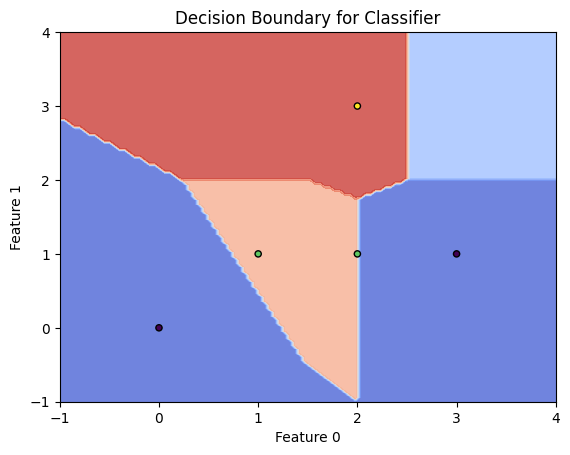

In [58]:
# Plot the decision boundary
plot_decision_boundary(regressor, df3[['x1', 'x2']], df3['y'])